In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [2]:
df= pd.read_csv('weather.csv')
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [4]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
df = df.dropna()  

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,7.742988,20.897561,1.440854,4.702439,8.014939,40.396341,10.414634,18.185976,71.100610,44.003049,1019.350000,1016.530793,3.905488,4.000000,12.815549,19.556402,1.422561
std,5.945199,6.707310,4.289427,2.681183,3.506646,13.132176,7.811544,8.926759,12.983367,16.605975,6.715244,6.469774,2.974957,2.652101,5.542521,6.644311,4.234023
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,2.000000,4.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.850000,15.500000,0.000000,2.550000,6.000000,31.000000,6.000000,11.000000,63.000000,32.000000,1014.800000,1012.400000,1.000000,1.000000,8.175000,14.500000,0.000000
50%,7.900000,20.400000,0.000000,4.400000,8.750000,39.000000,7.000000,17.000000,71.000000,42.500000,1019.750000,1016.900000,4.000000,4.000000,13.500000,18.850000,0.000000
75%,12.800000,25.800000,0.200000,6.600000,10.700000,46.000000,13.000000,24.000000,80.000000,54.000000,1024.300000,1021.125000,7.000000,7.000000,17.200000,24.225000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,93.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [7]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']

Data Visualization

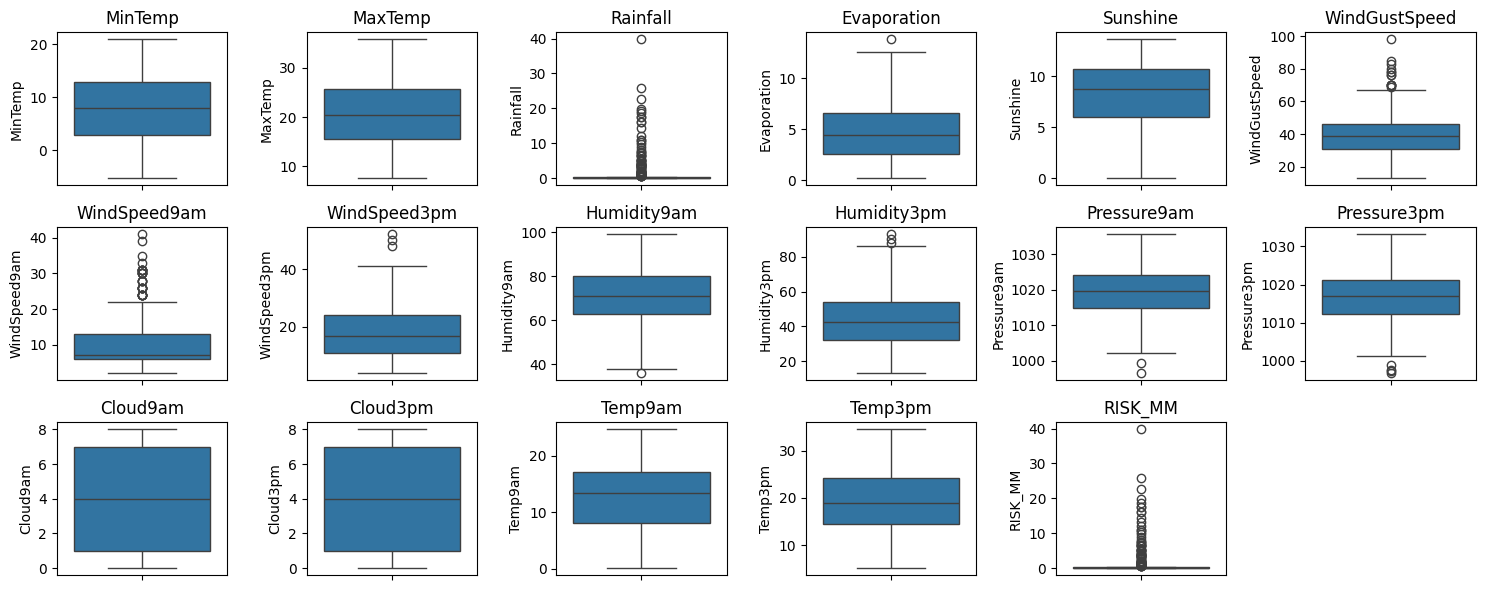

In [8]:
plt.figure(figsize=(15, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

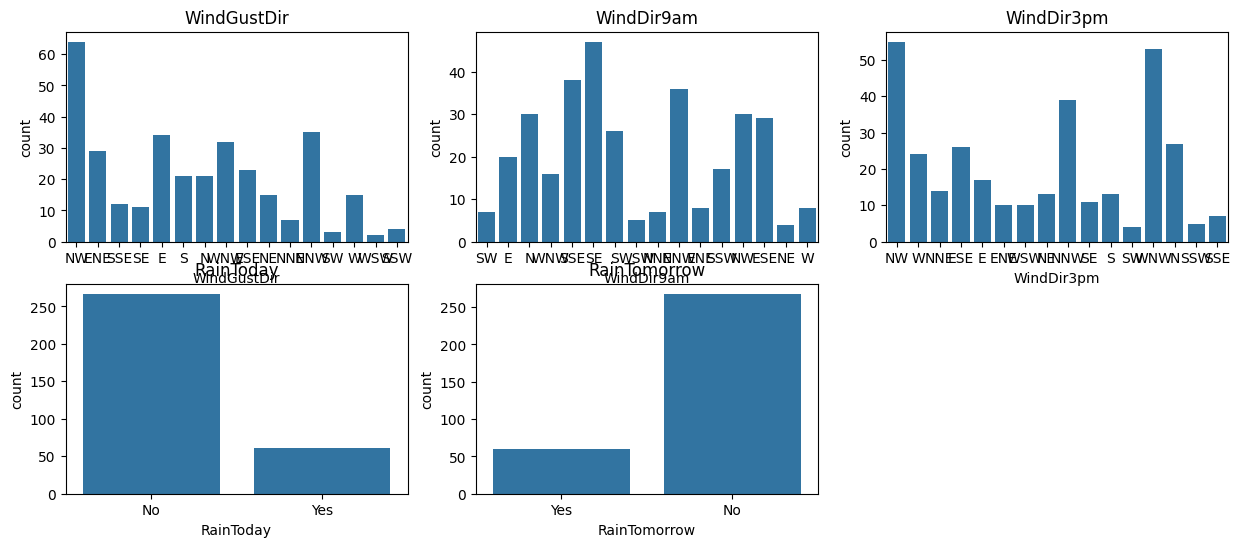

In [9]:
plt.figure(figsize=(15, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[column])
    plt.title(column)

plt.show()

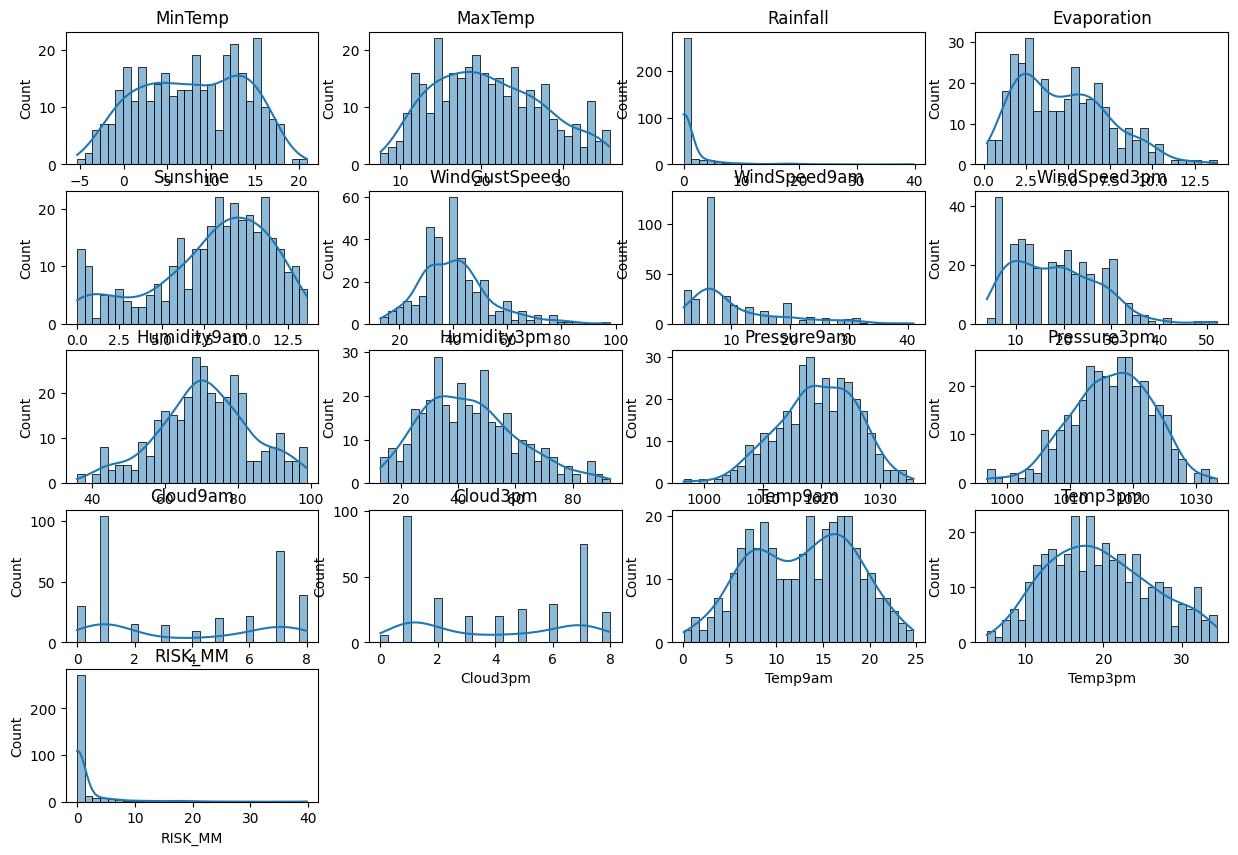

In [10]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(column)

plt.show()

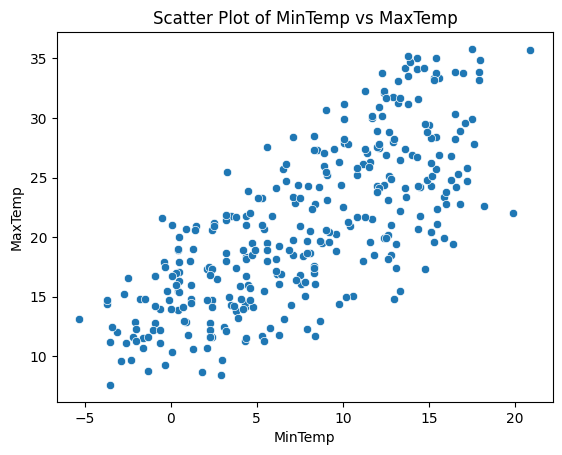

In [11]:
sns.scatterplot(x='MinTemp', y='MaxTemp', data=df)
plt.title('Scatter Plot of MinTemp vs MaxTemp')
plt.show()

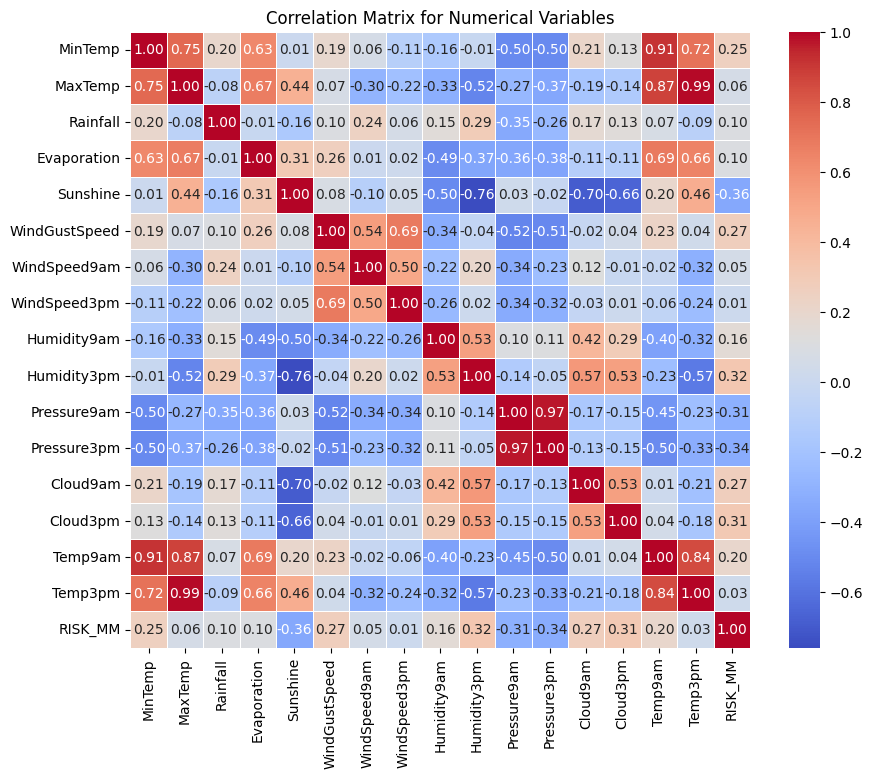

In [12]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

data preparing

In [13]:
le = LabelEncoder()

In [14]:
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

C:\Users\bedir\AppData\Local\Temp\ipykernel_15460\799908322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
C:\Users\bedir\AppData\Local\Temp\ipykernel_15460\799908322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
C:\Users\bedir\AppData\Local\Temp\ipykernel_15460\799908322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [15]:
X = df.drop(['RainToday'],axis=1)
y = df[['RainToday']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.312, random_state=42)

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
scaler.fit(X_train_scaled)

StandardScaler()

In [21]:
X_train_scaled = scaler.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

**models**

Logistic Regression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train_scaled,y_train)

c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
y_pred = lr.predict(X_test_scaled)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        81
           1       1.00      0.82      0.90        22

    accuracy                           0.96       103
   macro avg       0.98      0.91      0.94       103
weighted avg       0.96      0.96      0.96       103



In [26]:
print("accuracy = " ,accuracy_score(y_test,y_pred))

accuracy =  0.9611650485436893


In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

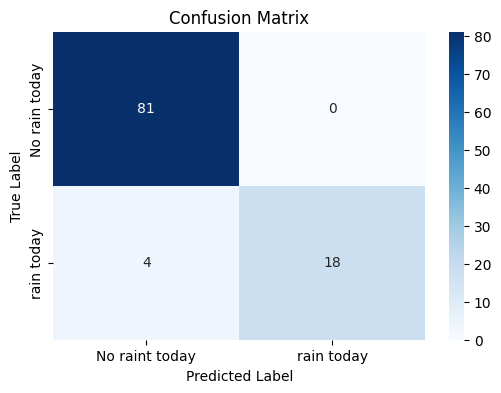

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No raint today', 'rain today'], yticklabels=['No rain today', 'rain today'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

KNN

In [29]:
param_grid = {
    'n_neighbors': np.arange(1,15),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [30]:
knn = KNeighborsClassifier()

In [31]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [32]:
grid_search.fit(X_train, y_train)

c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

best_params, best_accuracy

({'n_neighbors': np.int64(11), 'p': 2, 'weights': 'uniform'},
 np.float64(0.888888888888889))

In [34]:
knn2 = KNeighborsClassifier(11,weights='uniform',p=2)

In [35]:
knn2.fit(X_train, y_train)

c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [36]:
y_pred = knn2.predict(X_test)

In [37]:
print("accuracy = " ,accuracy_score(y_test,y_pred))

accuracy =  0.8252427184466019


In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

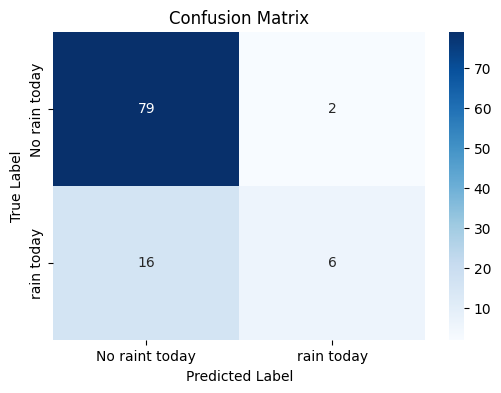

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No raint today', 'rain today'], yticklabels=['No rain today', 'rain today'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        81
           1       0.75      0.27      0.40        22

    accuracy                           0.83       103
   macro avg       0.79      0.62      0.65       103
weighted avg       0.81      0.83      0.79       103



DecisionTreeClassifier

In [41]:
DTC=DecisionTreeClassifier()

In [42]:
TGrid={
    'max_depth' : [3,6,None],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,3,5],
    'max_features':[3,9,None],
    'max_leaf_nodes':[1,2,None],
    'ccp_alpha':[0.001,0.01,0.1],
    }

In [43]:
dtc=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=TGrid , verbose=10)

In [44]:
dtc.fit(X_train,y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV 1/5; 1/729] START ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2
[CV 1/5; 1/729] END ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5; 1/729] START ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2
[CV 2/5; 1/729] END ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5; 1/729] START ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2
[CV 3/5; 1/729] END ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5; 1/729] START ccp_alpha=0.001, max_depth=3, max_features=3, max_leaf_nodes=1, min_sam

c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1215 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'max_depth': [3, 6, None],
                         'max_features': [3, 9, None],
                         'max_leaf_nodes': [1, 2, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]},
             verbose=10)

In [45]:
dtc=dtc.best_estimator_

In [46]:
y_pred = dtc.predict(X_test)

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

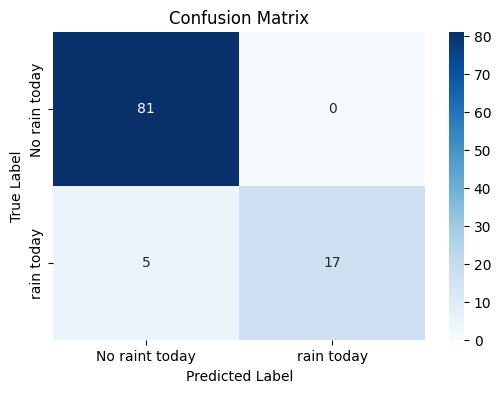

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No raint today', 'rain today'], yticklabels=['No rain today', 'rain today'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       1.00      0.77      0.87        22

    accuracy                           0.95       103
   macro avg       0.97      0.89      0.92       103
weighted avg       0.95      0.95      0.95       103



In [53]:
print("accuracy = " ,accuracy_score(y_test,y_pred))

accuracy =  0.9514563106796117
